In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

print(f"Version of TensorFlow : {tf.__version__}")

Version of TensorFlow : 2.15.0


In [4]:
data = pd.read_csv("creditcard_2023.csv")

In [5]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [6]:
print(f"Shape of data : {data.shape}")

Shape of data : (260539, 31)


## Preprocessing

##### Checking for duplicated data points and removing them

In [7]:
duplicated_values = data.value_counts()
duplicated_values = duplicated_values.to_frame()
duplicated_values.head(10)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0,1
173696,1.447074,-0.906814,0.176183,-1.031631,-0.062083,0.209379,0.263262,-0.151650,1.513940,0.493166,-0.300769,1.128453,-0.376556,0.859707,0.652029,0.895592,0.197483,0.953876,0.167424,-0.001746,0.014437,0.529390,-0.043777,-0.582205,-0.718118,1.435290,-0.325076,-0.192759,19153.76,0.0,1
173683,1.828348,-0.424808,-0.105537,-0.471382,0.463600,0.090649,0.461949,-0.180181,0.957788,0.459287,-1.351075,0.317009,-1.019144,0.418768,0.423303,0.742736,0.616653,0.221680,-0.123341,-0.400793,-0.264337,-0.968923,0.310119,0.311999,-0.517210,0.456665,-0.313761,-0.189285,18816.71,0.0,1
173684,1.608828,-0.962958,0.278663,-0.816344,-0.141870,0.485170,0.133169,-0.134537,0.482020,1.066392,-0.483183,1.029579,0.276629,0.626496,-0.491803,0.002221,0.294113,2.073962,-0.827767,-0.556048,-0.132894,0.153570,0.060371,-0.624211,-0.726665,1.491676,-0.269478,-0.201521,1867.33,0.0,1
173685,0.235241,-0.261394,0.564598,-0.879260,0.400191,-0.061412,0.918624,-0.202244,0.451590,0.348884,-1.460794,0.540663,-0.436672,0.824604,-0.636732,0.325472,0.362012,-0.103328,-0.253366,-0.276115,-0.162662,-0.421914,0.109324,-0.134710,-0.793893,0.474208,-0.256131,-0.018608,21127.10,0.0,1
173686,1.639648,-0.552295,-0.206744,-0.652153,0.834144,0.764953,0.581353,-0.142655,0.483766,0.676588,-0.144022,1.346194,-0.299788,1.297594,-0.251639,-0.053367,0.541122,-0.393179,-0.559209,-0.390151,-0.019144,0.707326,-0.096018,-2.414504,0.191038,1.870268,-0.335374,-0.357246,5301.92,0.0,1
173687,1.681684,-0.915400,0.285364,-1.137116,-0.087748,0.486938,0.123493,-0.126848,0.392303,1.000920,-0.076834,0.941306,0.529687,0.534723,-0.462731,1.717933,0.404454,-0.225717,0.421002,0.028738,-0.059354,0.050318,0.310355,1.500252,-0.935832,-1.248720,-0.240360,-0.166145,2515.17,0.0,1
173688,1.709028,-0.640604,0.263778,-0.515365,0.089365,0.581904,0.195874,-0.105818,1.498796,0.607403,-0.631863,0.992200,-0.645247,0.775267,-0.079088,0.789696,0.186134,1.082700,0.010336,-0.420263,-0.026366,0.680649,0.009797,-1.327741,-0.202585,-0.410442,-0.198127,-0.236262,15890.01,0.0,1
173689,1.800754,-0.417854,-0.080224,-0.441806,0.407441,-0.045004,0.484718,-0.195942,0.894752,0.455695,-1.133499,0.469239,-0.581607,0.387815,0.285317,0.714694,0.621013,0.191535,-0.149824,-0.352738,-0.255227,-0.922138,0.322352,0.983452,-0.528092,0.406150,-0.315431,-0.175399,20580.53,0.0,1


In [8]:
data = data.drop_duplicates()
data = data.reset_index()
data = data.drop(['index'], axis=1)
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [9]:
print(f"Shape of updated data : {data.shape}")

Shape of updated data : (260539, 31)


##### Checking NaN values

In [10]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

#### Checking the distribution of the Class and Undersampling

Here, output y is called class
* If Class = 1 -> Fraud Transaction
* If Class = 0 -> Legit Transaction

In [11]:
data['Class'].value_counts()

0.0    260067
1.0       471
Name: Class, dtype: int64

The data exhibits a significant bias towards legitimate transactions. A basic model predicting legitimate transactions every time would yield an accuracy of over 99%, which is not ideal. Therefore, #undersampling the data is necessary.

In [12]:
legit_data = data[data['Class'] == 0]
fraud_data = data[data['Class'] == 1]

In [13]:
print(f"Shape of Legit Data : {legit_data.shape}")
print(f"Shape of Fraud Data : {fraud_data.shape}")

Shape of Legit Data : (260067, 31)
Shape of Fraud Data : (471, 31)


Taking random samples from Legit Data same as size of Fraud Data

In [14]:
legit_data_updated = legit_data.sample(n = fraud_data.shape[0])

In [15]:

print(f"Shape of Legit Data : {legit_data_updated.shape}")
print(f"Shape of Fraud Data : {fraud_data.shape}")

Shape of Legit Data : (471, 31)
Shape of Fraud Data : (471, 31)


In [16]:
# Concatenate the data
data_updated = pd.concat([legit_data_updated, fraud_data], axis = 0)
data_updated

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
127404,127404,1.028125,-0.514826,0.583128,-0.412295,0.035328,0.040321,0.410961,-0.195236,-0.128601,...,-0.235802,-0.449785,0.008713,0.777043,0.734033,-0.841714,-0.191095,-0.035700,4763.29,0.0
10380,10380,-0.588246,0.378375,0.732482,-0.235455,0.546240,1.564437,-0.118739,-1.088292,0.538755,...,-1.285466,0.407863,0.202819,-2.336723,-0.474749,-0.911315,-0.864740,0.006655,21183.20,0.0
135375,135375,0.487030,0.116675,-0.267555,-0.099323,0.850977,-0.092876,0.606082,-0.066861,0.123356,...,-0.156551,-0.300689,-0.045189,-1.909907,-0.584363,-0.823796,-0.089677,-0.268226,21523.27,0.0
125918,125918,-0.726157,-2.308534,1.994746,0.043834,0.894522,-0.789663,0.141199,-0.093507,0.596657,...,0.197098,0.466498,1.698236,1.556191,-0.021418,1.249905,-0.419093,0.470352,12949.40,0.0
86232,86232,1.018825,-0.458281,0.529977,-0.498889,0.236705,0.599268,0.336361,-0.090819,0.617792,...,-0.209153,-0.794864,0.058259,-1.450031,0.153361,0.383901,-0.275003,-0.119969,16500.12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254344,254344,0.143802,-0.397000,0.146381,-0.859042,0.614958,0.177607,1.014042,-0.199242,0.624828,...,-0.116322,-0.265589,0.481187,0.762074,-0.774171,-0.582240,-0.213148,0.163668,22206.13,1.0
254395,254395,0.305472,-0.076932,0.655473,0.381575,0.929817,0.177831,1.046125,-0.239880,-0.278720,...,-0.007146,0.773171,-0.389887,-0.012388,0.736676,0.529656,-0.540308,-0.905484,21936.42,1.0
255403,255403,0.967747,0.290125,-0.652909,1.022656,0.709788,-0.296113,0.080976,-0.069615,-0.703708,...,-0.054126,-0.668847,-0.105206,-1.580190,0.476391,0.170009,0.363280,0.546882,6466.65,1.0
255556,255556,0.096481,0.708806,-0.744995,1.278760,1.034019,-0.520366,0.153282,0.017748,-1.241073,...,-0.004620,-0.470133,-0.308114,-1.861050,-0.141553,1.181867,0.267077,0.433314,2185.68,1.0


In [17]:
# randomly shuffling
data_updated = data_updated.sample(frac=1)
data_updated

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10498,10498,0.009458,-0.095895,1.983633,0.033705,0.307523,0.422076,0.529006,-0.133602,0.876909,...,-0.039808,0.524116,-0.077849,0.680052,-0.670324,-0.306876,-0.350541,-0.004995,9823.26,1.0
184359,184359,1.746874,-0.592183,-0.099661,-0.939134,0.243665,-0.502232,0.633125,-0.264848,1.092148,...,-0.102495,0.083061,0.002546,0.187197,0.129572,1.492677,-0.366179,-0.275555,9368.65,0.0
88897,88897,-0.951981,0.291630,-0.694641,0.905805,-0.656915,-0.194025,-0.777046,0.270275,0.090228,...,0.192476,0.406608,0.550310,-0.254338,-1.193946,-0.883502,-1.605132,1.529024,20673.84,1.0
891,891,0.054793,-0.271066,0.439403,-0.545316,1.531406,2.464379,0.669986,0.017492,0.319289,...,-0.151257,-0.161848,-0.082839,2.231257,0.159137,-0.633192,0.027715,-0.139585,14831.21,0.0
6329,6329,1.020308,0.425645,-0.554113,0.868349,2.367343,-0.360087,1.185828,-0.261569,-0.159521,...,-0.258401,-0.661236,-0.663639,-2.536292,2.502489,1.195597,-0.249226,0.254373,3492.59,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195337,195337,-0.285462,-0.282581,2.544951,-1.225414,-0.012042,0.486886,-0.055713,-0.449881,0.515836,...,0.450940,-0.450076,-1.108951,0.096011,-0.100293,-0.251453,-0.409581,0.203812,8417.32,0.0
55401,55401,0.005058,-0.111166,0.838655,-0.251542,0.619310,0.423492,0.622349,-0.115665,0.082479,...,-0.074969,0.136464,-0.198564,-0.745854,0.309888,-0.505752,-0.319707,-0.074814,11664.38,1.0
4920,4920,-0.476617,0.088942,0.326333,0.220370,-0.026730,0.432409,0.646165,-0.240646,0.356997,...,-0.223141,-0.851929,0.153117,-0.127032,-0.334872,-1.353308,-0.192302,-0.470796,2785.98,1.0
245556,245556,1.095351,-0.752986,-0.158673,-0.306387,0.179854,-0.236460,0.613604,-0.229949,1.223335,...,-0.049905,-0.153768,-0.232059,-0.429210,-0.242535,-1.549645,-0.234792,0.074817,710.65,1.0


In [18]:
data_updated['Class'].value_counts()

1.0    471
0.0    471
Name: Class, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(sampling_strategy='auto', random_state=42)
X_dummy, y_dummy = smt.fit_resample(data_updated.iloc[:,:-1], data_updated.iloc[:,-1])

In [20]:
data_updated = pd.concat([X_dummy, y_dummy], axis=1)

## Splitting the dataset and Feature Selection

In [21]:
X = data_updated.iloc[:300000,:-1]
Y = data_updated.iloc[:300000,-1]

In [22]:
# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt

# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# # Fit the classifier to the training data
# rf_classifier.fit(X_train, Y_train)

# # Get feature importances from the trained model
# feature_importances = rf_classifier.feature_importances_

# # Create a DataFrame to display feature importances
# feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# # Sort features by importance in descending order
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Plot the feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.title('Random Forest Feature Importance')
# plt.show()

In [23]:
X = X.loc[:, ['V14','V10','V4','V12','V17','V16','V11','V3','V9','V2']]
X.head()

,V14,V10,V4,V12,V17,V16,V11,V3,V9,V2
0,1.862280,0.530764,0.033705,-0.413675,0.479543,0.989301,-0.333210,1.983633,0.876909,-0.095895
1,0.967429,0.450766,-0.939134,1.042221,0.484524,0.026151,-1.101536,-0.099661,1.092148,-0.592183
2,-1.290326,-0.657985,0.905805,-1.133774,-1.145014,-1.425450,0.759394,-0.694641,0.090228,0.291630
3,0.668051,0.657625,-0.545316,0.477283,0.360721,0.128084,-0.973511,0.439403,0.319289,-0.271066
4,-0.792050,-0.151661,0.868349,-0.707596,4.707288,3.161528,0.314257,-0.554113,-0.159521,0.425645


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, shuffle=True)

In [25]:
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of Y_train : {Y_train.shape}")
print(f"Shape of Y_test : {Y_test.shape}")

Shape of X_train : (612, 10)
Shape of X_test : (330, 10)
Shape of Y_train : (612,)
Shape of Y_test : (330,)


In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
print(f"Shape of X_train : {X_train.shape}")


Shape of X_train : (612, 10)


In [28]:
# from sklearn.feature_selection import SelectKBest, mutual_info_classif
# from sklearn.datasets import make_classification
# # Get feature names
# feature_names = [f"Feature_{i}" for i in range(X_train.shape[1])]
# # Calculate mutual information scores
# mi_scores = mutual_info_classif(X_train, Y_train)

# # Select top k features with the highest mutual information scores
# top_k_features_mask = SelectKBest(mutual_info_classif, k=9).fit(X_train, Y_train).get_support()

# # Get the names of selected features
# selected_features = [feature_names[i] for i, is_selected in enumerate(top_k_features_mask) if is_selected]

# # Print selected features
# print("Selected Features: ", selected_features)


In [29]:
X_train.shape

(612, 10)

In [30]:
print(f"Shape of X_train : {X_train.shape}")

Shape of X_train : (612, 10)


## Models and Algorithm

### 1. Logistic Regression

In [31]:
logistic_r = LogisticRegression(penalty='l2', C=0.0001)
logistic_r.fit(X_train, Y_train)

LogisticRegression(C=0.0001)

In [32]:
Y_logistic_r = logistic_r.predict(X_test)
Y_logistic_r

array([0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

In [33]:
from sklearn.model_selection import cross_val_score

# Assuming you have X_train and Y_train
logistic_r = LogisticRegression(penalty='l2', C=0.1)
cv_scores_precision = cross_val_score(logistic_r, X_train, Y_train, cv=5, scoring='precision')
print(cv_scores_precision)

[0.98       1.         0.98148148 0.98181818 1.        ]


In [34]:
print(f"Accuracy : {accuracy_score(Y_test, Y_logistic_r)*100}%")
print(f"Confusion Matrix : \n {confusion_matrix(Y_test, Y_logistic_r)}")

Accuracy : 73.93939393939394%
Confusion Matrix : 
 [[149   0]
 [ 86  95]]


### 2.Decision Tree Classifier

In [35]:
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier with initial regularization
decision_tree_classification = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # Start with a shallower tree
    min_samples_split=100,  # Require more samples to split
    min_samples_leaf=30,  # Require more samples at leaf nodes
    max_features='sqrt',  # Consider fewer features at each split
    ccp_alpha=0.001  # Enable cost complexity pruning
)

# Define a grid of hyperparameters to explore
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [20, 30, 40],
    'ccp_alpha': [0.001, 0.006 , 0.01],
}

# Perform grid search cross-validation to find optimal hyperparameters
grid_search = GridSearchCV(decision_tree_classification, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_


In [36]:
Y_DTc= best_model.predict(X_test)

In [37]:
print(f"Accuracy : {accuracy_score(Y_test, Y_DTc)*100}%")
print(f"Confusion Matrix : \n {confusion_matrix(Y_test, Y_DTc)}")

Accuracy : 86.66666666666667%
Confusion Matrix : 
 [[147   2]
 [ 42 139]]


### 3. Random Forest Classifier

In [38]:
# param_grid = {
#     'n_estimators': [10, 20, 50, 100],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# random_forest_classification = RandomForestClassifier(n_estimators = 20, random_state=42)
# grid_search = GridSearchCV(random_forest_classification, param_grid, cv=5)
# grid_search.fit(X_train, Y_train)
# best_params = grid_search.best_params_
# best_random_forest = RandomForestClassifier(random_state=42, **best_params)
# best_random_forest.fit(X_train, Y_train)
# test_accuracy = best_random_forest.score(X_test, Y_test)
# print("Test Accuracy:", test_accuracy)

In [39]:
# Y_RF_class = random_forest_classification.predict(X_test)

In [40]:
# print(f"Accuracy : {accuracy_score(Y_test, Y_RF_class)*100}%")
# print(f"Confusion Matrix : \n {confusion_matrix(Y_test, Y_RF_class)}")

### 4. Neural Network approach

In [41]:
# model = Sequential()
# model.add(Input(X_train.shape[1]))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

In [55]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
    layers.Input(X_train.shape[1]),

    # Wider layers with more neurons:
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    # Stacked dense blocks for enhanced learning:
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    # Batch normalization for regularization and stability:
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),

    # Output layer with sigmoid activation:
    layers.Dense(1, activation='sigmoid')
])


In [56]:
model.compile(loss = binary_crossentropy,
              optimizer = SGD(learning_rate = 0.001),
              metrics = [
                  BinaryAccuracy(name='accuracy'),
                  Precision(name='precision'),
                  Recall(name='recall')]
              )

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1408      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)              

In [65]:
history = model.fit(X_train, Y_train, epochs = 100,  validation_split = 0.25)

Epoch 1/100
15/15 [==============================] - 1s 49ms/step - loss: 0.4887 - accuracy: 0.7582 - precision: 0.7835 - recall: 0.6878 - val_loss: 0.3358 - val_accuracy: 0.9085 - val_precision: 1.0000 - val_recall: 0.7971
Epoch 2/100
15/15 [==============================] - 0s 27ms/step - loss: 0.4775 - accuracy: 0.7843 - precision: 0.8427 - recall: 0.6787 - val_loss: 0.3317 - val_accuracy: 0.9085 - val_precision: 1.0000 - val_recall: 0.7971
Epoch 3/100
15/15 [==============================] - 0s 22ms/step - loss: 0.4892 - accuracy: 0.7473 - precision: 0.7749 - recall: 0.6697 - val_loss: 0.3267 - val_accuracy: 0.9085 - val_precision: 1.0000 - val_recall: 0.7971
Epoch 4/100
15/15 [==============================] - 0s 22ms/step - loss: 0.5158 - accuracy: 0.7625 - precision: 0.7947 - recall: 0.6833 - val_loss: 0.3208 - val_accuracy: 0.9216 - val_precision: 1.0000 - val_recall: 0.8261
Epoch 5/100
15/15 [==============================] - 0s 25ms/step - loss: 0.4896 - accuracy: 0.7865 - pr

ValueError: x and y must have same first dimension, but have shapes (10,) and (100,)

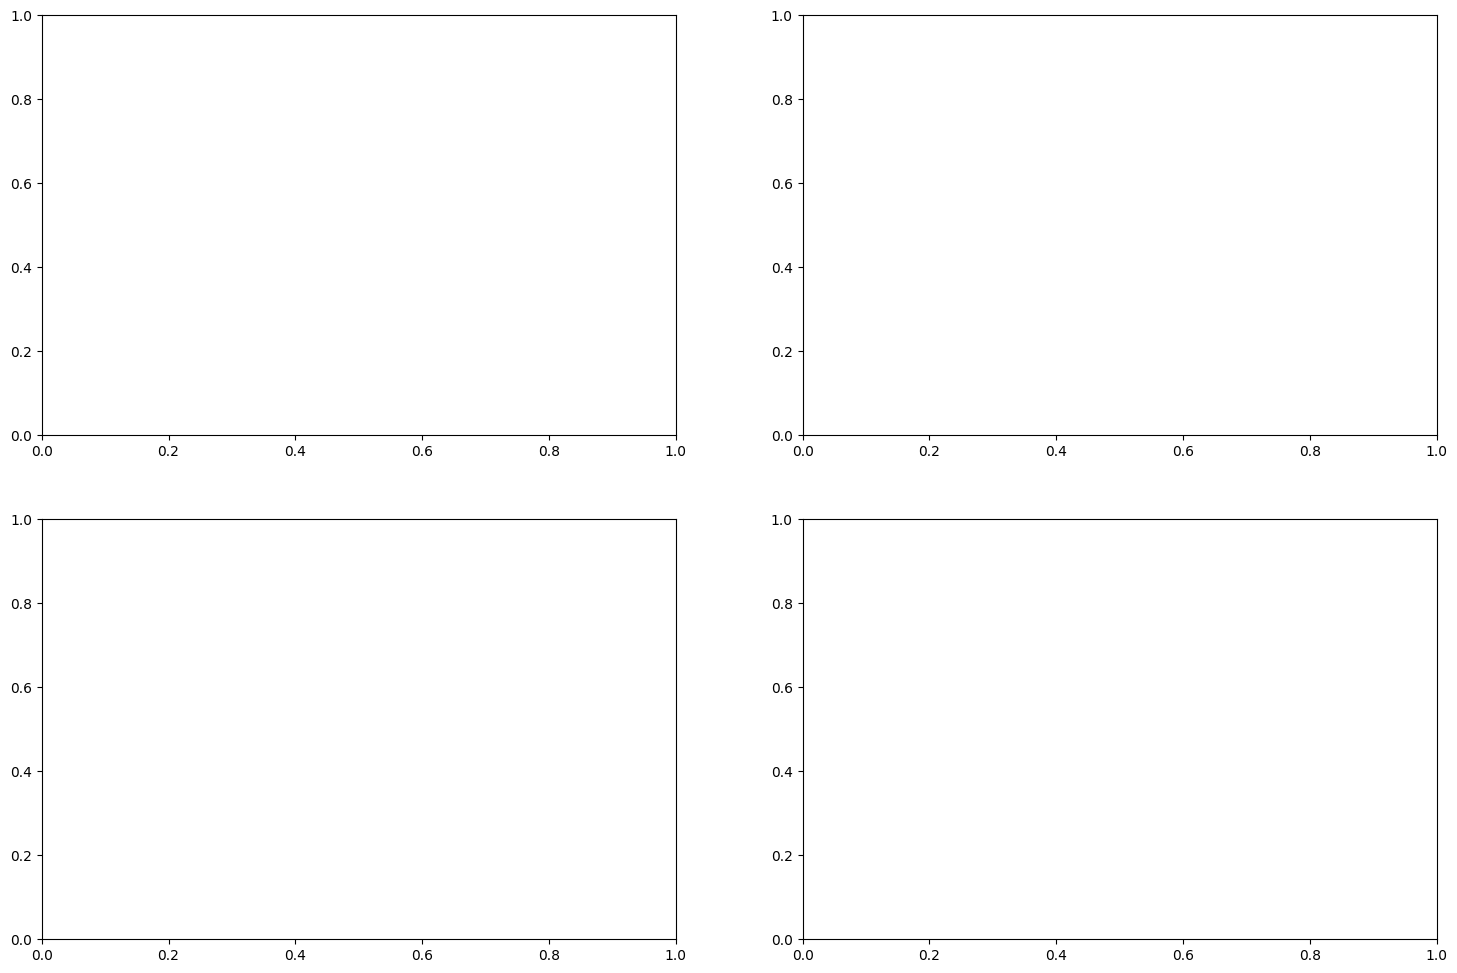

In [66]:
# i = np.arange(1, 11)

# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# fig.set_figheight(12)
# fig.set_figwidth(18)

# ax1.plot(i, history.history['loss'])
# ax1.plot(i, history.history['val_loss'])
# ax1.set_xlabel('Epoch')
# ax1.set_ylabel('Loss')
# ax1.set_title('Loss vs Epoch')
# ax1.legend(['Training', 'Validation'])

# ax2.plot(i, history.history['accuracy'])
# ax2.plot(i, history.history['val_accuracy'])
# ax2.set_xlabel('Epoch')
# ax2.set_ylabel('Accuracy')
# ax2.set_title('Accuracy vs Epoch')
# ax2.legend(['Training', 'Validation'])

# ax3.plot(i, history.history['precision'])
# ax3.plot(i, history.history['val_precision'])
# ax3.set_xlabel('Epoch')
# ax3.set_ylabel('Precision')
# ax3.set_title('Precision vs Epoch')
# ax3.legend(['Training', 'Validation'])

# ax4.plot(i, history.history['recall'])
# ax4.plot(i, history.history['val_recall'])
# ax4.set_xlabel('Epoch')
# ax4.set_ylabel('Recall')
# ax4.set_title('Recall vs Epoch')
# ax4.legend(['Training', 'Validation'])

# plt.show()


In [67]:
Y_neural_net = model.predict(X_test)
Y_neural_net = [1 if i > 0.5 else 0 for i in list(Y_neural_net)]

11/11 [==============================] - 0s 4ms/step


In [68]:
print(f"Accuracy : {accuracy_score(Y_test, Y_neural_net)*100}%")
print(f"Confusion Matrix : \n {confusion_matrix(Y_test, Y_neural_net)}")

Accuracy : 93.93939393939394%
Confusion Matrix : 
 [[147   2]
 [ 18 163]]


## Conclusion


All models work good but Neural Network gives the highest accuracy marginally i.e. 96.47%

In [69]:
print(f"Accuracy by Logistic Regression : {accuracy_score(Y_test, Y_logistic_r)*100}%")
print(f"Accuracy by Decision Tree Classifier : {accuracy_score(Y_test, Y_DTc)*100}%")
#print(f"Accuracy by Random Forest Classifier : {accuracy_score(Y_test, Y_RF_class)*100}%")
print(f"Accuracy by Neural Network : {accuracy_score(Y_test, Y_neural_net)*100}%")

Accuracy by Logistic Regression : 73.93939393939394%
Accuracy by Decision Tree Classifier : 86.66666666666667%
Accuracy by Neural Network : 93.93939393939394%


In [70]:
print(f"Confusion Matrix for Logistic Regression : \n {confusion_matrix(Y_test, Y_logistic_r)}")
print(f"Confusion Matrix for Decision Tree Classifier : \n {confusion_matrix(Y_test, Y_DTc)}")
#print(f"Confusion Matrix for Random Forest Classifier : \n {confusion_matrix(Y_test, Y_RF_class)}")
print(f"Confusion Matrix for Neural Network : \n {confusion_matrix(Y_test, Y_neural_net)}")

Confusion Matrix for Logistic Regression : 
 [[149   0]
 [ 86  95]]
Confusion Matrix for Decision Tree Classifier : 
 [[147   2]
 [ 42 139]]
Confusion Matrix for Neural Network : 
 [[147   2]
 [ 18 163]]


In [71]:
from sklearn.metrics import f1_score

f1 = f1_score(Y_test, Y_logistic_r)

print(f"F1 Score for Logistic regresson: {f1}")
#---------------------------------------------------------------------------
f1 = f1_score(Y_test, Y_DTc)

print(f"F1 Score for Decision tree     : {f1}")
#---------------------------------------------------------------------------
#f1 = f1_score(Y_test, Y_RF_class)

# print(f"F1 Score: {f1}")
#---------------------------------------------------------------------------
f1 = f1_score(Y_test, Y_neural_net)

print(f"F1 Score for Neural Network    : {f1}")

F1 Score for Logistic regresson: 0.6884057971014492
F1 Score for Decision tree     : 0.8633540372670807
F1 Score for Neural Network    : 0.9421965317919075
